### Simple Linear Regression

Simple Linear Regression is a statistical method used to model the relationship between a single predictor (independent variable, x) and a quantitative response (dependent variable, y). The goal is to find the best-fitting line that represents a linear relationship between these two variables. 

The following code outlines how to do so. 

In [1]:
import pandas as pd 

df = pd.read_csv('/Users/muhammadmuhdhar/Desktop/Repo/ml-algorithms-from-scratch/HousingData.csv')
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


<function matplotlib.pyplot.show(close=None, block=None)>

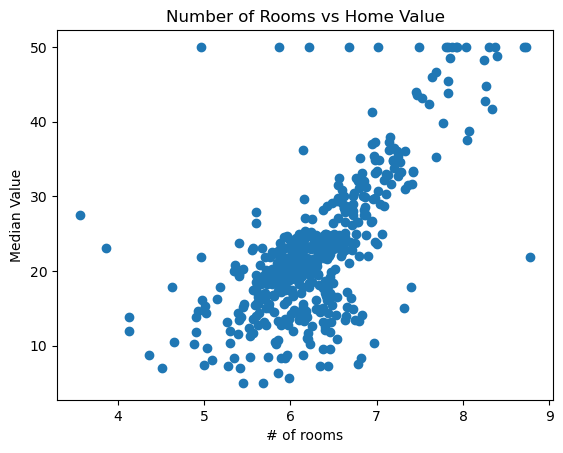

In [2]:
# plotting variables with a linear relationship
import matplotlib.pyplot as plt

plt.scatter(df.RM, df.MEDV)
plt.title("Number of Rooms vs Home Value")
plt.xlabel('# of rooms')
plt.ylabel("Median Value")
plt.show

In [3]:
X = df['RM'] # Indepedent Variable
y = df['MEDV'] # Depedent Variable

### Least Squares Method

The relationship between $x$ and $y$ is modeled by the following linear equation:

$\hat{y} = {\beta_0} + {\beta_1}{x}$ 

How the Formula Works:

1. ${\beta_0}$: This is the *intercept* of the regression line, which represents the predicted value of $y$ when the independent variable $x$ is zero. In the context of the regression line, it shows where the line crosses the y-axis.

2. ${\beta_1}$ : This is the *slope* of the regression line. It indicates the change in the predicted value of $y$ for a one-unit change in $x$. The slope determines the steepness and direction of the line


The main objective of simple linear regression is to find the line that best fits the data points. This is done using the *least squares method*, which minimizes the sum of the squared differences between the observed values and the predicted values. These differences are known as *residuals*. The formula can be broken down into these steps:

1. **Calculate the Slope $\beta_1$:**
   
   - The formula for the slope $\beta_1$ is:
     
     $
     \beta_1 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2}
     $
     - **Numerator:** Measures how the deviations of $x$ from its mean $\bar{x}$ correlate with the deviations of $y$ from its mean $\bar{y}$. This is the *covariance* between $x$ and $y$.
     - **Denominator:** Measures the total variation in $x$ values, known as the *variance* of $x$. It captures how spread out the $x$ values are.




In [4]:
import numpy as np

X_mean = np.mean(X)
y_mean = np.mean(y)

numerator = np.sum((X - X_mean) * (y - y_mean))
denominator = np.sum((X - X_mean) ** 2)

beta_1 = numerator / denominator

beta_1 # slope of best fit line 

9.10210898118031

2. **Calculate the Intercept $\beta_0$:**
   - Once the slope $\beta_1$ is found, the intercept $\beta_0$ is calculated using:
    
     $
     \beta_0 = \bar{y} - \beta_1 \bar{x}
     $
     - This formula ensures that the regression line passes through the point $\bar{x}, \bar{y}$, which is the mean of the data points.


In [5]:
beta_0 = y_mean - beta_1 * X_mean
beta_0

-34.67062077643857

Now that we have the two beta coefficients, we can use them in the formula to predict the value of $\hat{y}$:

$\hat{y} = {\beta_0} + {\beta_1}{x}$ 

In [6]:
y_pred = beta_0 + beta_1 * X

y_pred

0      25.175746
1      23.774021
2      30.728032
3      29.025938
4      30.382152
         ...    
501    25.339584
502    21.034286
503    28.825691
504    27.169108
505    20.215096
Name: RM, Length: 506, dtype: float64

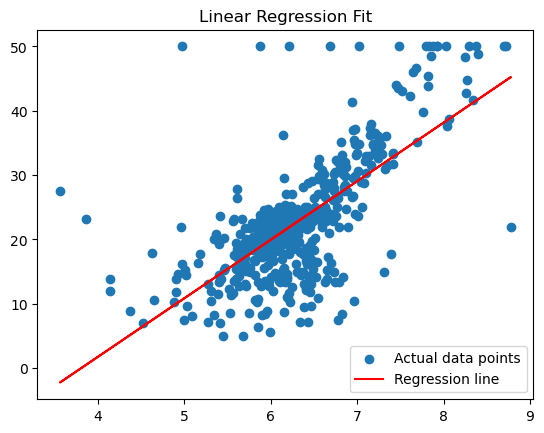

In [7]:
plt.scatter(X, y, label='Actual data points')
plt.plot(X, y_pred, color='red', label='Regression line')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()

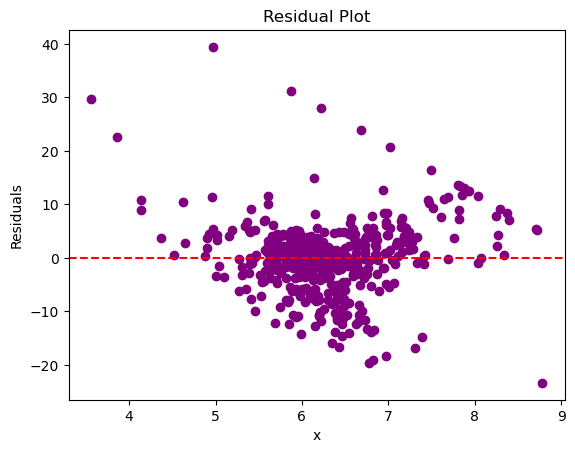

In [8]:
# Calculate residual sum square, in the most ideal situation this should be somehere around 0
residuals = y - y_pred
RSS = np.sum(residuals ** 2)

# Plot residuals
plt.scatter(X, residuals, color='purple')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('x')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In [13]:
TSS = np.sum((y - np.mean(y)) ** 2)
r_squared = 1 - (RSS / TSS)
r_squared

0.48352545599133423

### Residual Standard Error (RSE)

Residual Standard Error *(RSE)* is a measure of the typical distance between the observed values and the regression line. It gives us an idea of the average error made by the regression model in predicting the response variable.

**Formula for RSE**

The formula for calculating the RSE is:

$
\text{RSE} = \sqrt{\frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{n - 2}}
$

- $y_i$: The actual observed value of the response variable.
- $\hat{y}_i$: The predicted value of the response variable from the regression model.
- $n$:The number of observations in the dataset.
- The denominator $n - 2$ accounts for the loss of degrees of freedom (since we estimate two parameters: the slope and the intercept).

RSE is used to determine *standard errors* of the estimated coefficients. These standard errors measure the uncertainty in our estimates, allowing us to construct *confidence intervals* for the true values of these coefficients.

### Confidence Interval 

SE is used to determine standard error of the estimated coefficients. These standard errors measure the uncertainty in our estimates, allowing us to construct confidence intervals for the true values of these coefficients.

**Confidence Interval for the Slope $\beta_1$**

The formula for a 95% confidence interval for the slope $\beta_1$ is:

$
\beta_1 \pm 1.96 \times SE(\beta_1)
$

**Confidence Interval for the Intercept $\beta_0$**

Similarly, the 95% confidence interval for the intercept $\beta_0$) is:

$
\beta_0 \pm 1.96 \times SE(\beta_0)
$


**Interpretation of Confidence Intervals**

A 95% confidence interval means that if we were to sample data and fit the linear regression model many times, approximately 95% of those intervals would contain the true value of the coefficient. Narrower confidence intervals indicate more precise estimates of the coefficients.




In [10]:
RSE = np.sqrt(RSS/(len(X)-2))
RSE

6.616159749715356

In [11]:
high_slope_confidence = beta_1 + 1.96 * RSE
low_slope_confidence= beta_1 - 1.96 * RSE

print(f'For each one-unit increase in X, y is expected to increase by somewhere between {high_slope_confidence} and {low_slope_confidence} points')


For each one-unit increase in X, y is expected to increase by somewhere between 22.069782090622407 and -3.865564128261788 points


In [12]:
high_intercept_confidence = beta_0 + 1.96 * RSE
low_intercept_confidence= beta_0 - 1.96 * RSE

print(f'When the predictor X is 0, y is expected to be somewhere between {high_intercept_confidence} and {low_intercept_confidence} points')


When the predictor X is 0, y is expected to be somewhere between -21.702947666996472 and -47.638293885880664 points
